In [2]:
# Seyur Lutchminarain 2088960
# Eston Naicker 2079375
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
#Question 1
####################################################################################
def genData(means,variance):
    classes = []
    
    for i in range(len(means)):
        sub_class = np.random.normal(means[i],variance,(20,2))
        classes += [sub_class] 
    
    return classes
    

In [4]:
def scatterData(clusters):
    
    data = clusters[0]
    for i in range(1,len(clusters)):
        data = np.concatenate((data,clusters[i]), axis = 0)

    plt.scatter(data[:,0],data[:,1])
    plt.show()

    return data

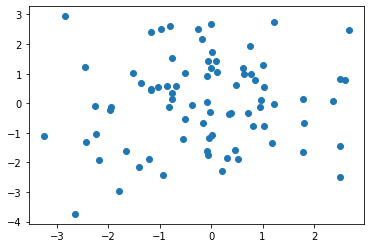

In [5]:
means = np.array([[1,-1],[-1,1],[-1,-1],[1,1]])
variance = 1.0 

clusters = genData(means,variance)
data = scatterData(clusters)

In [6]:
# means = np.array([[1,-1],[-1,1],[-1,-1],[1,1]]) # This dataset shows us clearly that lower variances
# variance = 0.2                                    # allows us to cluster data more easily

# clusters = genData(means,variance)
# data = scatterData(clusters)

In [7]:
# Question 3 Starts Here
####################################################################################################

In [8]:
def genCentres(n):
    
    centres = np.random.normal([0,0,0],1,(n,3))
    
    return centres
    

In [9]:
def findDistance(x,c):
    
    result = 0
    
    for i in range(len(x)):
        
        result += abs(x[i] - c[i])
        
    
    return result
        

In [10]:
def closest(x,centres):
    minimum = 1000000
    for i in range(len(centres)):
        if findDistance(x,centres[i]) < minimum:
            minimum = findDistance(x,centres[i])
            min_centre = i
    return min_centre
            

In [11]:
def obj_error(data,centres):
    result = 0
    for i in range(len(centres)):
        for j in range(len(data[i])):
            result += np.linalg.norm(data[i][j] - centres[i])
    return (result/2.0)

In [12]:
def k_means(x, j, d1, d2):
    c = 1
    error = [10]
    k = genCentres(j)
    data = []
    
    for i in range(j):
        data.append([])
    for i in range(len(x)):
        cj = closest(x[i], k)
        data[cj].append(x[i])
    error.append(obj_error(data,k))
    
    while error[c] != error[c-1] and c < 100:
        c += 1
        del data
        data = []
        data_final = []
        for i in range(j):
            data.append([])
        for i in range(len(x)):
            cj = closest(x[i], k)
            data[cj].append(x[i])
            data_final.append(np.round(k[cj]))
        for p in range(len(k)):
            temp = [0,0,0]
            if len(data[p]) != 0:
                temp[0] = np.sum(np.array(data[p]).T[0])/len(data[p])
                temp[1] = np.sum(np.array(data[p]).T[1])/len(data[p])
                temp[2] = np.sum(np.array(data[p]).T[2])/len(data[p])
            k[p] = temp
        error.append(obj_error(data,k))
    data_final = np.array(data_final)
    data_final = data_final.astype(int)
    data_final.shape = (d1, d2, 3)
    #print(data_final)
    plt.imshow(data_final)

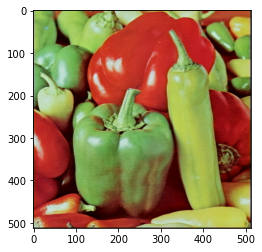

In [12]:
image = plt.imread(r'C:\Users\Wits user\Documents\YEAR 3 COMS\COMS3007 MACHINE LEARNING\TUTORIALS\TUT 7 - Clustering\peppers.bmp')
plt.imshow(image)




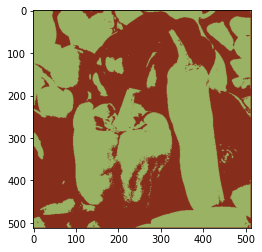

In [13]:
k = 2
x,y,r, = image.shape
image.shape = (x*y,3)
k_means(image,k,x,y)

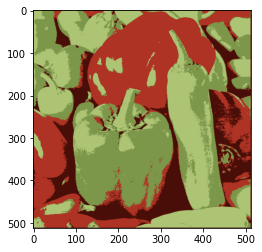

In [14]:
image = plt.imread(r'C:\Users\Wits user\Documents\YEAR 3 COMS\COMS3007 MACHINE LEARNING\TUTORIALS\TUT 7 - Clustering\peppers.bmp')
plt.imshow(image)
k = 4
x,y,r, = image.shape
image.shape = (x*y,3)
k_means(image,k,x,y)

In [15]:
# Clearly as the number of clusters increase, the quality of the image increases drastically
# But in turn, an increase in the number of clusters greatly increases processing time

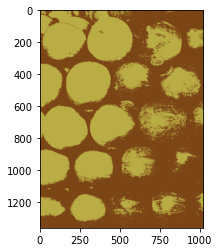

In [13]:
image = plt.imread(r'C:\Users\Wits user\Documents\YEAR 3 COMS\COMS3007 MACHINE LEARNING\TUTORIALS\TUT 7 - Clustering\apples.jpg')
plt.imshow(image)
k = 2
x,y,r, = image.shape
image.shape = (x*y,3)
k_means(image,k,x,y)